Here we are predicting the weight of the Fish by looking at some know variables.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [6]:
Fish_details = pd.read_csv('Fish.csv')

In [7]:
Fish_details.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
Fish_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
Fish_details.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [12]:
Fish_details.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [13]:
labelencoder = LabelEncoder()

In [14]:
Fish_details['Species'] = labelencoder.fit_transform(Fish_details['Species'])

In [15]:
Fish_details.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [16]:
y = Fish_details['Weight'].values
X = Fish_details.drop(['Weight'],axis=1).values

In [17]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

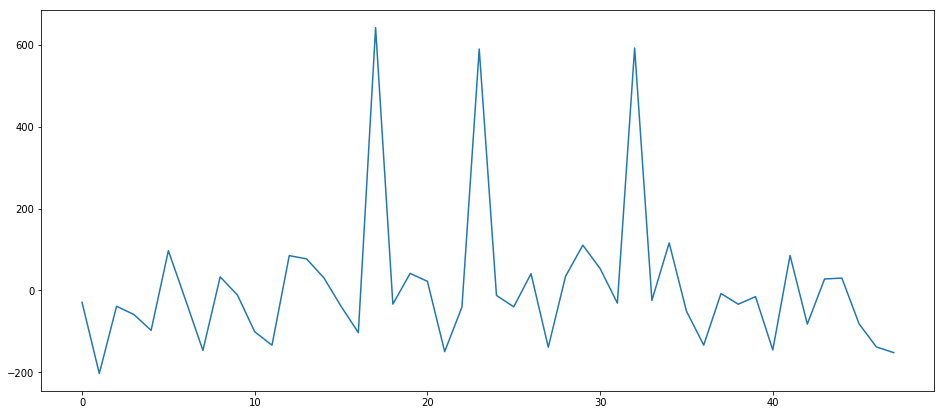

In [33]:
y_pred_lr = lr.predict(x_test)

c = [i for i in range(len(x_test))]
plt.figure(figsize=(16,7))
plt.plot(c,y_test - y_pred_lr,'-')
plt.show()

In [34]:
y_pred_lr

array([ 419.12602876,  202.97696943,  208.75405095,  218.69507433,
        653.67823368,  802.9146768 ,  823.90911115,  446.58153381,
        941.8377313 ,  126.37538765,  301.05997214,  589.77744193,
        915.02916125,  922.90543264,   28.93438746,  116.74740297,
        248.15533183,  957.85215894,  163.41487325,  678.39873943,
         32.84024258,  539.4146887 ,  160.60490618, 1060.18341522,
        102.28960386,  490.08411607,  659.09189832,  408.71572774,
        815.42007348, -100.84311361,  596.52789555,  140.94356669,
        957.85215894,  324.21406832,  583.91389425,  275.52860225,
        433.54963875,  627.58334266,  733.70580533,  150.19888418,
        659.45747101,  -45.46316158,  227.15690288,  686.05794256,
        -10.47029544,  278.90912513,  318.15208462,  369.91510856])

In [21]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
x_test_sm = sm.add_constant(x_test)
lr_ols_1 = sm.OLS(y_train,x_train_sm).fit()

In [17]:
print(lr_ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     175.4
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           4.74e-52
Time:                        21:33:37   Log-Likelihood:                -665.60
No. Observations:                 111   AIC:                             1345.
Df Residuals:                     104   BIC:                             1364.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        395.7180      9.598     41.230      0.0

In [30]:
from sklearn.metrics import mean_absolute_error,r2_score
print('score:',lr.score(x_test,y_test))
print('MAE:',mean_absolute_error(y_test,y_pred_lr))

score: 0.8276775554963893
MAE: 104.29357951497188


## Export the Model

In [35]:
from sklearn.externals import joblib

C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [39]:
joblib.dump(lr,'Fish_weight_Predictor.ml')

['Fish_weight_Predictor.ml']